In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans

In [70]:
def weightedAvg(data):
    rdata = pd.DataFrame()
    for player in set(data.pid):
        p= data[data['pid'] == player]
        ser = len(p)
        p = p.drop(['pid', 'series_code'], axis = 1 )
        p = pd.DataFrame(p.mean(axis = 0))
        p = p.swapaxes('index', 'columns')

        p.insert(0, 'pid', player)
        p.insert(0, 'series_played', ser)
        rdata = rdata.append(p)
    return rdata

In [71]:
df = pd.read_csv('playerIR.csv')[:]
df = weightedAvg(df)

In [72]:
df.shape

(1360, 6)

In [116]:
df = df.reset_index().drop(['index'], axis=1)
df.head()
df.shape

(1360, 7)

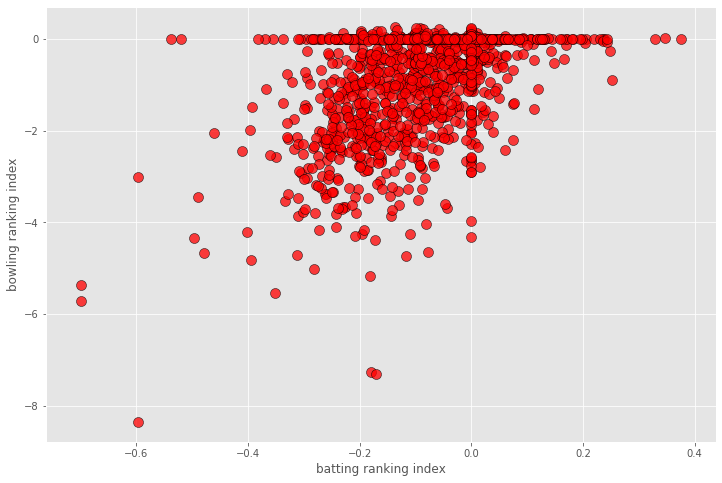

In [117]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(df.batRI, df.bowlRI, s = 100, c = 'red', edgecolor = 'black', linewidth = .6, alpha = .75)
plt.xlabel('batting ranking index')
plt.ylabel('bowling ranking index')
plt.style.use('ggplot')

# plt.figure(num=None, figsize=(4000, 4000))
plt.show()

In [118]:
kmeans = KMeans(n_clusters=5)

In [119]:
kmeans.fit(df[['batRI', 'bowlRI']])
df['clusterRI'] = kmeans.predict(df[['batRI', 'bowlRI']])


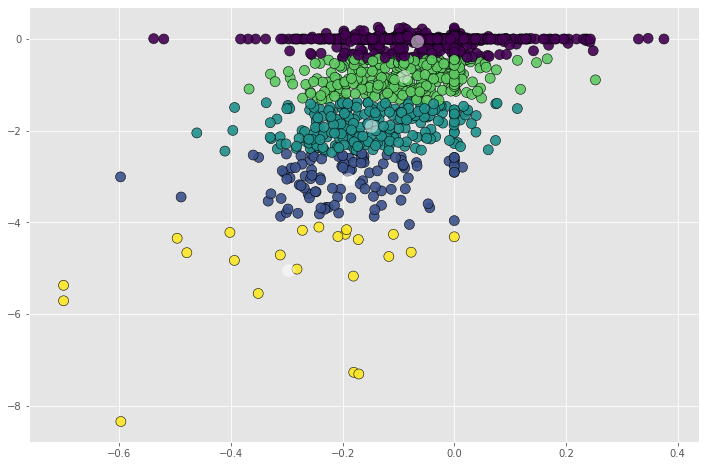

In [120]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.scatter(df.batRI, df.bowlRI, c = df['clusterRI'] , s=100 ,edgecolor = 'black', linewidth = .6 ,alpha = .9)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'white', s=150, alpha=.5);

# plt.xscale('linear')
# plt.yscale('linear')
plt.show()



In [115]:
df.to_csv('clustered1.csv', index=False)

In [90]:
# d = pd.read_csv('clustered1.csv', )
# d.head()